In [1]:
import os
import sys
#os.chdir(os.path.expanduser("~") + "/book/ch03")
import urllib
from urllib.request import urlretrieve as ur
import os.path
"""
Listing 3-3
URL for the AlienVault IP Reputation Database (OSSIM format)
storing the URL in a variable makes it easier to modify later
if it changes. NOTE: we are using a specific version of the data
in these examples, so we are pulling it from an alternate 
book-specific location.
"""

'\nListing 3-3\nURL for the AlienVault IP Reputation Database (OSSIM format)\nstoring the URL in a variable makes it easier to modify later\nif it changes. NOTE: we are using a specific version of the data\nin these examples, so we are pulling it from an alternate \nbook-specific location.\n'

In [2]:
avURL = "http://datadrivensecurity.info/book/ch03/data/reputation.data"
# relative path for the downloaded data
avRep = "../data/reputation.data"

using an if-wrapped test with urllib.urlretrieve() vs direct read via panads avoids having to re-download a 16MB file every time we run the script

In [3]:
if not os.path.isfile(avRep):
    ur(avURL, filename=avRep)

In [4]:
# Listing 3-5
import pandas as pd
# read in the data into a pandas data frame
av = pd.read_csv(avRep, sep="#", header=None)

make smarter column names

In [5]:
av.columns = ["IP","Reliability","Risk","Type","Country",
              "Locale","Coords","x"]

In [6]:
av.head()

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11


Listing 3-6 require object: av (3-5) See corresponding output in Figure 3-1 import the capability to display Python objects as formatted HTML

In [7]:
from IPython.display import HTML 
# display the first 10 lines of the dataframe as formatted HTML
HTML(av.head(10).to_html())

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
6,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12


Listing 3-8

require object: av (3-5)

In [8]:
av['Reliability'].describe()

count    258626.000000
mean          2.798040
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [9]:
av['Risk'].describe()

count    258626.000000
mean          2.221362
std           0.531571
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

Listing 3-10

require object: av (3-5) factor_col(col)

helper function to mimic R's "summary()" function for pandas "columns" (which are really just Python arrays)

In [10]:
def factor_col(col):
    factor = pd.Categorical.from_array(col)
    return pd.value_counts(factor,sort=True).reindex(factor.categories)

In [11]:
rel_ct = pd.value_counts(av['Reliability'])
risk_ct = pd.value_counts(av['Risk'])
type_ct = pd.value_counts(av['Type'])
country_ct = pd.value_counts(av['Country'])

In [12]:
factor_col(av['Reliability'])

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


1       5612
2     149117
3      10892
4      87040
5          7
6       4758
7        297
8         21
9        686
10       196
dtype: int64

In [13]:
factor_col(av['Risk'])

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


1        39
2    213852
3     33719
4      9588
5      1328
6        90
7        10
dtype: int64

In [14]:
factor_col(av['Type']).head(n=10)

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
dtype: int64

In [15]:
factor_col(av['Country']).head(n=10)

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
dtype: int64

Listing 3-14 require object: av (3-5) See corresponding output in Figure 3-5

NOTE: Notice the significant differnce in the Python graph in that the blank/empty country code entries are not in the graph need some functions from matplotlib to help reduce 'chart junk'

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# sort by country
country_ct = pd.value_counts(av['Country'])

plot the data

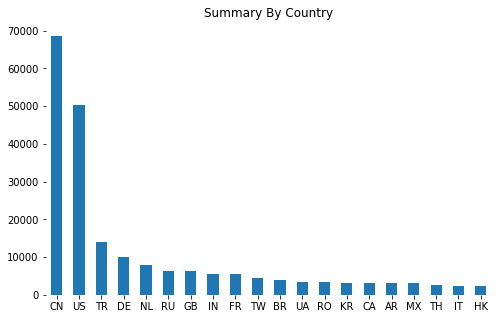

In [17]:
plt.axes(frameon=0) # reduce chart junk
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Country", figsize=(8,5)).grid(False)

Listing 3-15

requires packages: matplotlib

require object: av (3-5), factor_col (3-10)

See corresponding output in Figure 3-6

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


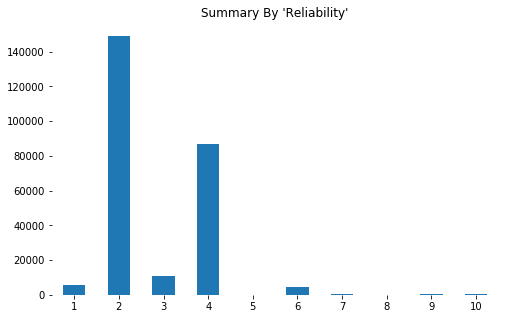

In [18]:
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Reliability']).plot(kind='bar', rot=0,
           title="Summary By 'Reliability'", figsize=(8,5)).grid(False)

Listing 3-16

requires packages: matplotlib

require object: av (3-5), factor_col (3-10)

See corresponding output in Figure 3-7

C:\Users\Ripti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


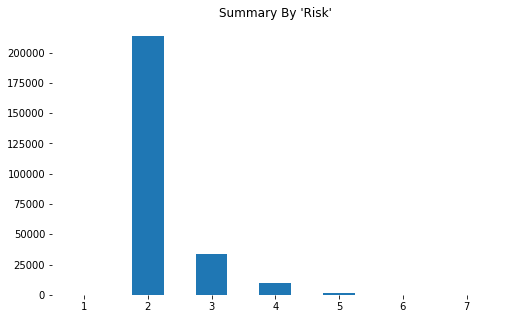

In [19]:
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Risk']).plot(kind='bar', rot=0, 
           title="Summary By 'Risk'", figsize=(8,5)).grid(False)

Listing 3-18

require object: av (3-5)

extract the top 10 most prevalent countries

In [20]:
top10 = pd.value_counts(av['Country'])[0:9] 
# calculate the % for each of the top 10
top10.astype(float) / len(av['Country'])

CN    0.265182
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024332
IN    0.021189
FR    0.021069
Name: Country, dtype: float64

Listing 3-20

require object: av (3-5)

compute contingency table for Risk/Reliability factors which produces a matrix of counts of rows that have attributes at each (x, y) location need cm for basic colors need arange to modify axes display

In [21]:
from matplotlib import cm
from numpy import arange
print(pd.crosstab(av['Risk'], av['Reliability']).to_string())

Reliability    1       2     3      4   5     6    7   8    9   10
Risk                                                              
1               0       0    16      7   0     8    8   0    0   0
2             804  149114  3670  57653   4  2084   85  11  345  82
3            2225       3  6668  22168   2  2151  156   7  260  79
4            2129       0   481   6447   0   404   43   2   58  24
5             432       0    55    700   1   103    5   1   20  11
6              19       0     2     60   0     8    0   0    1   0
7               3       0     0      5   0     0    0   0    2   0


graphical view of contingency table (swapping risk/reliability)

Text(0.5,1,'Risk ~ Reliability')

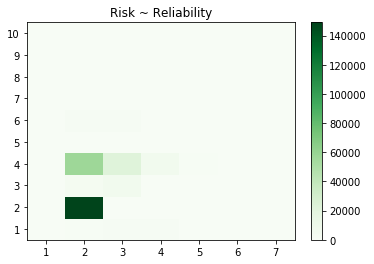

In [22]:
xtab = pd.crosstab(av['Reliability'], av['Risk'])
plt.pcolor(xtab,cmap=cm.Greens)
plt.yticks(arange(0.5,len(xtab.index), 1),xtab.index)
plt.xticks(arange(0.5,len(xtab.columns), 1),xtab.columns)
plt.colorbar()
plt.title("Risk ~ Reliability")